In [15]:
import pandas as pd
import numpy as np

cocktails_df = pd.read_csv('cocktails_cleaned.csv', index_col=0)

cocktails_df = cocktails_df.drop(columns=['id',
                                          'master_recipe_id',
                                          'edition_year']).replace(np.nan,
                                                                   '?')

cocktails_df.shape
cocktails_df.columns

Index(['name', 'ingredient_id_0', 'recipe_ingredient_type_0',
       'measurement_id_0', 'amount_0', 'ingredient_id_1',
       'recipe_ingredient_type_1', 'measurement_id_1', 'amount_1',
       'ingredient_id_2', 'recipe_ingredient_type_2', 'measurement_id_2',
       'amount_2', 'ingredient_id_3', 'recipe_ingredient_type_3',
       'measurement_id_3', 'amount_3', 'ingredient_id_4',
       'recipe_ingredient_type_4', 'measurement_id_4', 'amount_4',
       'ingredient_id_5', 'recipe_ingredient_type_5', 'measurement_id_5',
       'amount_5', 'ingredient_id_6', 'recipe_ingredient_type_6',
       'measurement_id_6', 'amount_6', 'ingredient_id_7',
       'recipe_ingredient_type_7', 'measurement_id_7', 'amount_7',
       'ingredient_id_8', 'recipe_ingredient_type_8', 'measurement_id_8',
       'amount_8', 'ingredient_id_9', 'recipe_ingredient_type_9',
       'measurement_id_9', 'amount_9', 'ingredient_id_10',
       'recipe_ingredient_type_10', 'measurement_id_10', 'amount_10',
       'ingred

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(cocktails_df)

print(train.shape, test.shape)

(1764, 62) (589, 62)


In [17]:
from sklearn.metrics import accuracy_score

target = 'year_introduced'

X_train = train.drop(columns=target)
X_test = test.drop(columns=target)

y_train = train[target]
y_test = test[target]

# Getting the majority class...
majority_class = y_train.mode()[0]

# Always predicting the majority class...
y_pred = [majority_class] * len(y_train)

# Getting accuracy score...
accuracy_score(y_train, y_pred)

0.2732426303854875


Train Accuracy Score: 0.4897959183673469
Test Accuracy Score: 0.4601018675721562


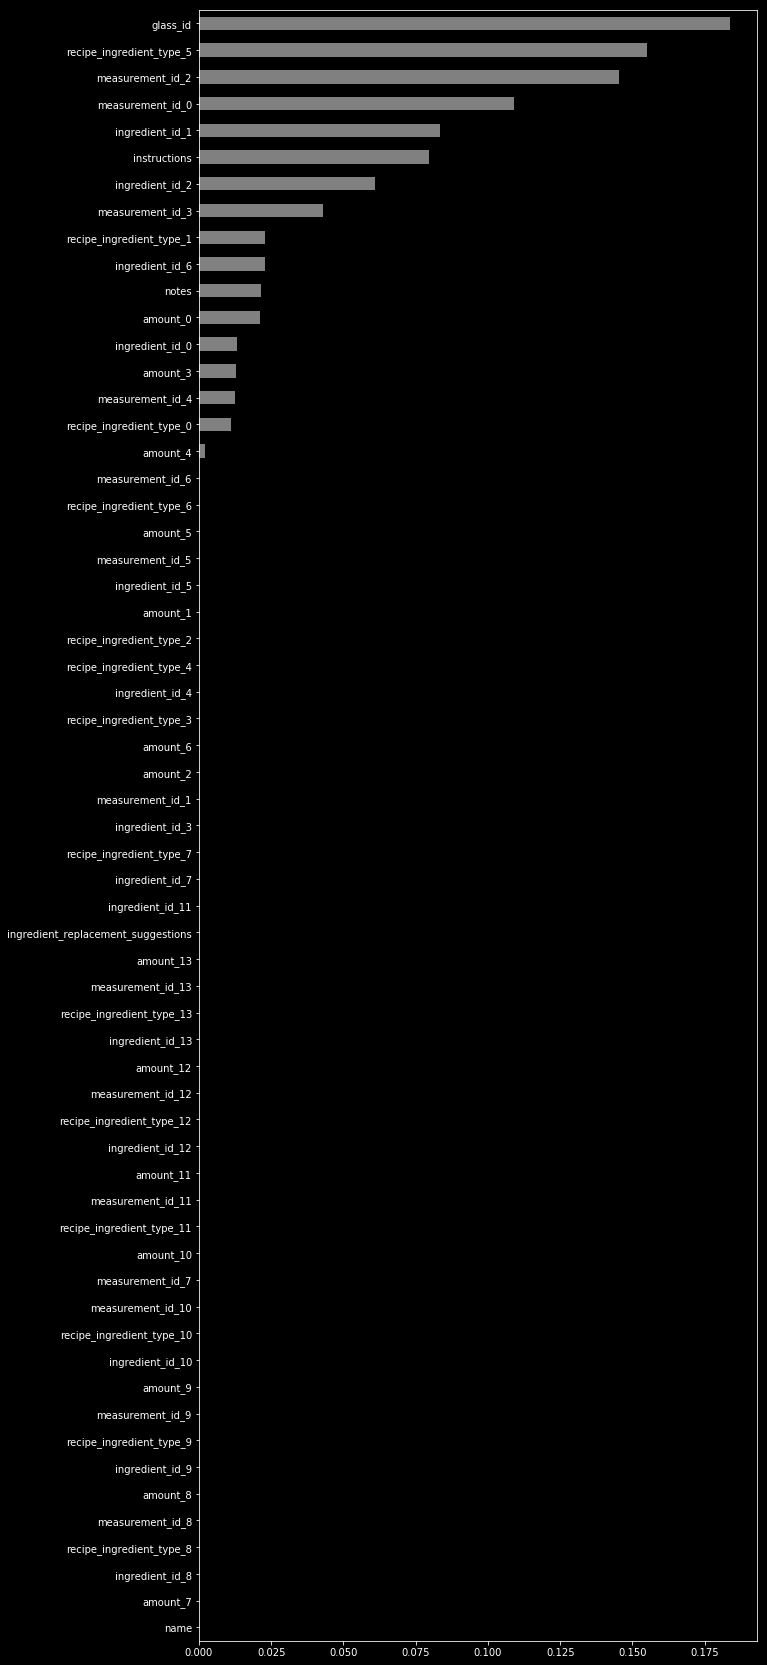

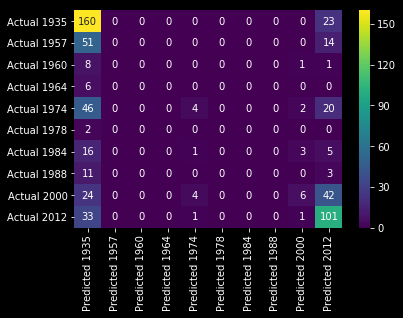

In [32]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Making a pipeline to encode, scale, and classify...
# Tuning hyperparameters based on experiment...
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RobustScaler(),
    RandomForestClassifier(n_estimators=100,
                           max_features=10,
                           max_depth=5,
                           n_jobs=-1)
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Getting train and validation accuracy scores...
print('\nTrain Accuracy Score:', pipeline.score(X_train, y_train))
print('Test Accuracy Score:', pipeline.score(X_test, y_test))

# Getting and plotting feature importances from pipeline...
coefficients = pd.Series(pipeline[2][1].feature_importances_,
                         X_train.columns.tolist())
plt.style.use('dark_background')
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');
plt.show()

# Defining function to plot confusion matrix...
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}'  for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

# Plotting confusion matrix for validation predictions...
plot_confusion_matrix(y_test, y_pred);